# Import dati:

In [28]:
import json
import pandas as pd
import numpy as np
from random import randrange
from matplotlib import pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_2016_cleaned_ready_for_masking.csv', encoding='utf-8')
df.iloc[:,0:9].head(10)

,name,grade,userGrade,setby,userRating,repeats,isBenchmark,holdsets,apiId
0,Far from the Madding Crowd,6B+,6B+,other,4,24993,True,Hold Set B,19215
1,Wuthering Heights,6B+,6B+,other,4,35673,True,Hold Set A,19216
2,Problem 3,6B+,6B+,other,4,757,False,Original School Holds | Hold Set A | Hold Set B,19217
3,HARD TIMES,7A,7A,other,5,8670,True,Hold Set B,19218
4,Problem 5,7A,7A,other,4,255,False,Hold Set B,19219
5,CRIME AND PUNISHMENT,7B,7B,other,4,253,False,Original School Holds,19220
6,Shortround,6C+,6C+,other,4,550,False,Original School Holds,19221
7,Vurt,7B,7B,other,4,1301,True,Hold Set A | Hold Set B,19222
8,Problem 9,7A+,7A+,other,4,2413,True,Hold Set A | Hold Set B,19223
9,Tess,6C+,6C+,other,4,9617,True,Original School Holds | Hold Set A | Hold Set B,19224


# Feature Engeneering:

In questa sezione andremo a creare delle maschere sulla matrice per poter aggiungere informazione all nostro dataset

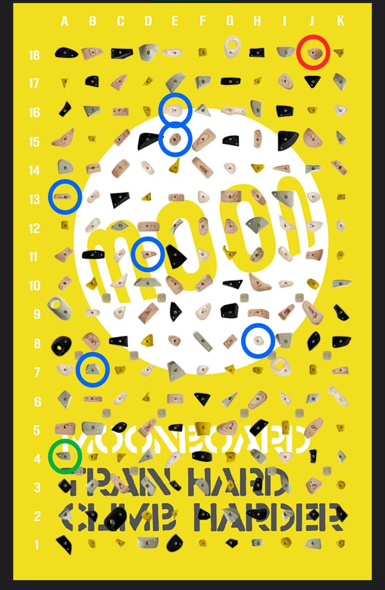

In [36]:
from PIL import Image
from IPython.display import display

# Apri l'immagine
img = Image.open('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/weekday.jpg')

# Taglia 100 pixel dall'alto
width, height = img.size
cropped_img = img.crop((0, 151, width, height))

# Ridimensiona (ad esempio, metà delle dimensioni)
resized_img = cropped_img.resize((width // 2, (height - 100) // 2))

# Mostra l'immagine modificata nel notebook
display(resized_img)

In [37]:
holds = df.loc[:, "A1":"K18"]
holds = (holds != 0).astype(int)
holds

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59501,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
59502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Masking generico: (non implementato ancora)

codice che crea tutte le possibili suddivisioni in bande orizzontali (da 2 a 18) e verticali (da 2 a 11) per la matrice 18x11, aggiungendo per ogni banda una colonna con il conteggio delle prese:

+ Le colonne create saranno ad esempio num_holds_rowband_3_1 (prima banda su 3 orizzontali), num_holds_colband_4_2 (seconda banda su 4 verticali), ecc.
+ Puoi modificare il range di suddivisione se vuoi meno bande.
+ Questo codice genera molte colonne: valuta se ti servono tutte o solo alcune suddivisioni.

Ogni suddivisione della matrice in bande, il codice crea una nuova colonna che rappresenta il conteggio delle prese (hold) in quella specifica banda.

Esempi pratici:

+ num_holds_rowband_3_1: Numero di prese nella prima banda quando dividi la matrice in 3 bande orizzontali (cioè la parte alta, centrale o bassa della Moonboard).

+ num_holds_rowband_3_2: Numero di prese nella seconda banda su 3 orizzontali.

+ num_holds_colband_4_2: Numero di prese nella seconda banda quando dividi la matrice in 4 bande verticali (cioè una delle fasce verticali da sinistra a destra).

In generale:

+ num_holds_rowband_X_Y → Y-esima banda su X totali in orizzontale (righe)
+ num_holds_colband_X_Y → Y-esima banda su X totali in verticale (colonne)

In [ ]:
cols = list("ABCDEFGHIJK")
n_rows = 18
n_cols = 11

# Bande orizzontali (suddivisione sulle righe)
for n_bande in range(2, n_rows + 1):
    for i in range(n_bande):
        start_row = i * n_rows // n_bande + 1
        end_row = (i + 1) * n_rows // n_bande
        banda_cols = [f"{col}{row}" for col in cols for row in range(start_row, end_row + 1)]
        col_name = f'num_holds_rowband_{n_bande}_{i+1}'
        holds[col_name] = holds[banda_cols].sum(axis=1)

# Bande verticali (suddivisione sulle colonne)
for n_bande in range(2, n_cols + 1):
    for i in range(n_bande):
        start_col_idx = i * n_cols // n_bande
        end_col_idx = (i + 1) * n_cols // n_bande
        banda_cols = [f"{col}{row}" for col in cols[start_col_idx:end_col_idx] for row in range(1, n_rows + 1)]
        col_name = f'num_holds_colband_{n_bande}_{i+1}'
        holds[col_name] = holds[banda_cols].sum(axis=1)

holds.head()

## Masking Avanzato:

In [8]:
import numpy as np
from skimage.measure import block_reduce
from scipy.ndimage import uniform_filter, center_of_mass

In [9]:
def estrai_feature_avanzate(matrice):
    features = []

    # --- Globali base ---
    totale = np.sum(matrice)
    densità = totale / (18 * 11)
    centroide = center_of_mass(matrice)
    coords = np.argwhere(matrice)
    var_y, var_x = (np.var(coords[:, 0]), np.var(coords[:, 1])) if coords.size > 0 else (0, 0)
    sim_vert = np.mean(matrice[:, :5] == np.fliplr(matrice[:, 6:]))
    sim_oriz = np.mean(matrice[:9, :] == np.flipud(matrice[9:, :]))
    diag_1 = np.trace(matrice)
    diag_2 = np.trace(np.fliplr(matrice))
    media_loc = uniform_filter(matrice.astype(float), size=3)

    features += [totale, densità, *centroide, var_y, var_x, sim_vert, sim_oriz, diag_1, diag_2]
    features += [np.mean(media_loc), np.std(media_loc)]
    features += [np.count_nonzero(np.sum(matrice, axis=0)), np.count_nonzero(np.sum(matrice, axis=1))]

    # --- Segmentazioni verticali (orizzontali sulla matrice) ---
    def segmenta_verticale(matrice, n):
        step = 18 // n
        feat = []
        for i in range(n):
            blocco = matrice[i*step : (i+1)*step, :]
            feat += [np.sum(blocco), np.mean(blocco)]
        return feat

    # --- Segmentazioni orizzontali (verticali sulla matrice) ---
    def segmenta_orizzontale(matrice, n):
        step = 11 // n
        feat = []
        for i in range(n):
            blocco = matrice[:, i*step : (i+1)*step]
            feat += [np.sum(blocco), np.mean(blocco)]
        return feat

    # Aggiungiamo a diverse granularità
    for n in [2, 3, 4]:
        features += segmenta_verticale(matrice, n)
        features += segmenta_orizzontale(matrice, n)

    # --- Blocchi 3x3 (griglia locale) ---
    for i in range(0, 18, 6):
        for j in range(0, 11, 4):
            blocco = matrice[i:i+6, j:j+4]
            if blocco.shape[0] == 6 and blocco.shape[1] == 4:
                blocco_coords = np.argwhere(blocco)
                blocco_centroide = center_of_mass(blocco) if np.any(blocco) else (0, 0)
                blocco_var = np.var(blocco_coords[:, 0]) if blocco_coords.size else 0
                blocco_var += np.var(blocco_coords[:, 1]) if blocco_coords.size else 0
                features += [np.sum(blocco), np.mean(blocco), *blocco_centroide, blocco_var]

    return np.array(features)


In [10]:
# Supponiamo di avere N osservazioni
N = 100
dataset = np.random.randint(0, 2, size=(N, 18, 11))
print(dataset)

[[[0 0 0 ... 0 0 0]
  [1 0 1 ... 1 1 1]
  [0 0 1 ... 0 1 0]
  ...
  [0 1 1 ... 1 1 0]
  [0 0 1 ... 1 0 0]
  [1 1 1 ... 1 1 0]]

 [[0 1 1 ... 1 1 0]
  [1 0 1 ... 0 1 0]
  [1 1 1 ... 0 0 1]
  ...
  [0 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  [1 0 0 ... 1 1 1]]

 [[1 1 1 ... 1 1 0]
  [0 1 0 ... 1 0 1]
  [1 0 0 ... 1 0 0]
  ...
  [1 1 0 ... 1 0 0]
  [0 0 0 ... 1 1 0]
  [0 0 0 ... 1 1 1]]

 ...

 [[1 0 0 ... 0 1 1]
  [0 0 0 ... 0 1 0]
  [0 1 1 ... 0 1 1]
  ...
  [0 0 0 ... 1 0 0]
  [1 1 0 ... 1 0 0]
  [1 1 1 ... 1 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 1 0 ... 0 1 1]
  [1 1 0 ... 0 0 1]
  ...
  [0 1 1 ... 0 1 1]
  [1 1 1 ... 0 1 1]
  [1 1 1 ... 0 0 0]]

 [[0 1 0 ... 1 1 1]
  [0 0 0 ... 0 1 1]
  [1 1 1 ... 0 1 0]
  ...
  [0 0 1 ... 0 0 0]
  [1 0 0 ... 0 1 0]
  [1 1 1 ... 0 1 1]]]


In [11]:
# Applichiamo la trasformazione a tutto il dataset
X_features = np.array([estrai_feature_avanzate(m) for m in dataset])
print(X_features.shape)  # (100, num_features)

(100, 80)


In [12]:
X_features

array([[ 91.        ,   0.45959596,   8.61538462, ...,   2.66666667,
          1.91666667,   3.29861111],
       [ 95.        ,   0.47979798,   8.21052632, ...,   3.5       ,
          1.875     ,   1.359375  ],
       [102.        ,   0.51515152,   8.40196078, ...,   2.3125    ,
          1.625     ,   4.44921875],
       ...,
       [103.        ,   0.52020202,   8.27184466, ...,   2.5       ,
          1.57142857,   4.06632653],
       [ 97.        ,   0.48989899,   9.22680412, ...,   2.58333333,
          1.33333333,   4.46527778],
       [104.        ,   0.52525253,   8.65384615, ...,   2.58823529,
          1.76470588,   4.06920415]], shape=(100, 80))

In [44]:
# Feature engineering completo per matrice 18x11 binaria (arrampicata)
import numpy as np
from scipy.ndimage import center_of_mass, label, uniform_filter
from scipy.stats import skew, entropy
from scipy.stats import skew
from skimage.util import view_as_windows

In [45]:
def safe_skew(arr):
        if np.std(arr) < 1e-8:
            return 0.0  # oppure np.nan
        return skew(arr)

def estrai_feature_complete_con_nomi(matrice):
    features = []
    feature_names = []

    # --- Globali base ---
    totale = np.sum(matrice)
    centroide = center_of_mass(matrice)
    coords = np.argwhere(matrice)
    var_y, var_x = (np.var(coords[:, 0]), np.var(coords[:, 1])) if coords.size > 0 else (0, 0)
    sim_vert = np.mean(matrice[:, :5] == np.fliplr(matrice[:, 6:]))
    sim_oriz = np.mean(matrice[:9, :] == np.flipud(matrice[9:, :]))
    diag_1 = np.trace(matrice)
    diag_2 = np.trace(np.fliplr(matrice))
    media_loc = uniform_filter(matrice.astype(float), size=3)
    
    features += [totale, *centroide, var_y, var_x, sim_vert, sim_oriz, diag_1, diag_2]
    feature_names += [
        "totale", "centroide_y", "centroide_x", "var_y", "var_x",
        "sim_vert", "sim_oriz", "diag_1", "diag_2"
    ]
    features += [np.mean(media_loc), np.std(media_loc)]
    feature_names += ["media_loc_mean", "media_loc_std"]
    features += [np.count_nonzero(np.sum(matrice, axis=0)), np.count_nonzero(np.sum(matrice, axis=1))]
    feature_names += ["colonne_usate", "righe_usate"]

    # --- Segmentazioni orizzontali e verticali ---

    # Segmentazioni sulle righe: 2, 3, 4, 6, 9, 18 bande
    for n in [2, 3, 4, 6, 9, 18]:
        for i in range(n):
            features += [np.sum(matrice[i*18//n:(i+1)*18//n, :]), np.mean(matrice[i*18//n:(i+1)*18//n, :])]
            feature_names += [f"sum_rowband_{n}_{i+1}", f"mean_rowband_{n}_{i+1}"]

    # Segmentazioni sulle colonne: 2, 3, 4, 5, 11 bande
    for n in [2, 3, 4, 5, 11]:
        for i in range(n):
            features += [np.sum(matrice[:, i*11//n:(i+1)*11//n]), np.mean(matrice[:, i*11//n:(i+1)*11//n])]
            feature_names += [f"sum_colband_{n}_{i+1}", f"mean_colband_{n}_{i+1}"]

    # --- Blocchi fissi (macro-zone 6x4, 9x4, 6x2, 3x3) ---

    # Blocchi 6x4
    for i in range(0, 18, 6):
        for j in range(0, 11, 4):
            blocco = matrice[i:i+6, j:j+4]
            if blocco.shape == (6,4):
                blocco_coords = np.argwhere(blocco)
                blocco_centroide = center_of_mass(blocco) if np.any(blocco) else (0, 0)
                blocco_var = np.var(blocco_coords[:, 0]) + np.var(blocco_coords[:, 1]) if blocco_coords.size else 0
                features += [np.sum(blocco), np.mean(blocco), *blocco_centroide, blocco_var]
                feature_names += [
                    f"blocco6x4_{i}_{j}_sum", f"blocco6x4_{i}_{j}_mean",
                    f"blocco6x4_{i}_{j}_centroide_y", f"blocco6x4_{i}_{j}_centroide_x",
                    f"blocco6x4_{i}_{j}_var"
                ]
    # Blocchi 9x4
    for i in range(0, 18, 9):
        for j in range(0, 11, 4):
            blocco = matrice[i:i+9, j:j+4]
            if blocco.shape == (9,4):
                blocco_coords = np.argwhere(blocco)
                blocco_centroide = center_of_mass(blocco) if np.any(blocco) else (0, 0)
                blocco_var = np.var(blocco_coords[:, 0]) + np.var(blocco_coords[:, 1]) if blocco_coords.size else 0
                features += [np.sum(blocco), np.mean(blocco), *blocco_centroide, blocco_var]
                feature_names += [
                    f"blocco9x4_{i}_{j}_sum", f"blocco9x4_{i}_{j}_mean",
                    f"blocco9x4_{i}_{j}_centroide_y", f"blocco9x4_{i}_{j}_centroide_x",
                    f"blocco9x4_{i}_{j}_var"
                ]
    # Blocchi 6x2
    for i in range(0, 18, 6):
        for j in range(0, 11, 2):
            blocco = matrice[i:i+6, j:j+2]
            if blocco.shape == (6,2):
                blocco_coords = np.argwhere(blocco)
                blocco_centroide = center_of_mass(blocco) if np.any(blocco) else (0, 0)
                blocco_var = np.var(blocco_coords[:, 0]) + np.var(blocco_coords[:, 1]) if blocco_coords.size else 0
                features += [np.sum(blocco), np.mean(blocco), *blocco_centroide, blocco_var]
                feature_names += [
                    f"blocco6x2_{i}_{j}_sum", f"blocco6x2_{i}_{j}_mean",
                    f"blocco6x2_{i}_{j}_centroide_y", f"blocco6x2_{i}_{j}_centroide_x",
                    f"blocco6x2_{i}_{j}_var"
                ]
    # Blocchi 3x3
    for i in range(0, 18, 3):
        for j in range(0, 11, 3):
            blocco = matrice[i:i+3, j:j+3]
            if blocco.shape == (3,3):
                blocco_coords = np.argwhere(blocco)
                blocco_centroide = center_of_mass(blocco) if np.any(blocco) else (0, 0)
                blocco_var = np.var(blocco_coords[:, 0]) + np.var(blocco_coords[:, 1]) if blocco_coords.size else 0
                features += [np.sum(blocco), np.mean(blocco), *blocco_centroide, blocco_var]
                feature_names += [
                    f"blocco3x3_{i}_{j}_sum", f"blocco3x3_{i}_{j}_mean",
                    f"blocco3x3_{i}_{j}_centroide_y", f"blocco3x3_{i}_{j}_centroide_x",
                    f"blocco3x3_{i}_{j}_var"
                ]

    # --- Feature aggiuntive ---

    # Skewness e entropia
    skew_y = safe_skew(np.sum(matrice, axis=1))
    skew_x = safe_skew(np.sum(matrice, axis=0))
    p_col = np.sum(matrice, axis=0)
    p = p_col / (np.sum(p_col) + 1e-6)
    entr = entropy(p)
    features += [skew_y, skew_x, entr]
    feature_names += ["skew_y", "skew_x", "entropy"]

    # Clustering
    clusters, n_clusters = label(matrice)
    cluster_sizes = np.bincount(clusters.flatten())[1:]
    mean_cluster_size = cluster_sizes.mean() if len(cluster_sizes) > 0 else 0
    max_cluster_size = cluster_sizes.max() if len(cluster_sizes) > 0 else 0
    features += [n_clusters, mean_cluster_size, max_cluster_size, n_clusters / (totale + 1e-6)]
    feature_names += ["n_clusters", "mean_cluster_size", "max_cluster_size", "clusters_per_hold"]

    # Sliding window densità massima
    if matrice.shape[0] >= 3 and matrice.shape[1] >= 3:
        finestra = view_as_windows(matrice, (3, 3))
        dens_blocchi = np.sum(finestra, axis=(2,3))
        max_dens = np.max(dens_blocchi)
        features.append(max_dens)
        feature_names.append("max_density_3x3")
    else:
        features.append(0)
        feature_names.append("max_density_3x3")

    # Bounding box e forma
    if coords.size > 0:
        min_y, min_x = coords.min(axis=0)
        max_y, max_x = coords.max(axis=0)
        h = max_y - min_y + 1
        w = max_x - min_x + 1
        aspect_ratio = w / h if h > 0 else 0
        features += [h, w, aspect_ratio]
        feature_names += ["bbox_h", "bbox_w", "aspect_ratio"]
    else:
        features += [0, 0, 0]
        feature_names += ["bbox_h", "bbox_w", "aspect_ratio"]

    # Transizioni (switch)
    switch_righe = np.sum(np.abs(np.diff(matrice, axis=1)))
    switch_colonne = np.sum(np.abs(np.diff(matrice, axis=0)))
    features += [switch_righe, switch_colonne]
    feature_names += ["switch_righe", "switch_colonne"]

    return np.array(features), feature_names

In [46]:
# Esempio di uso su dataset
dataset = np.random.randint(0, 2, size=(100, 18, 11))
X, feature_names = zip(*[estrai_feature_complete_con_nomi(m) for m in dataset])
X = np.array(X)
df_features = pd.DataFrame(X, columns=feature_names[0])
df_features.head()

,totale,centroide_y,centroide_x,var_y,var_x,sim_vert,sim_oriz,diag_1,diag_2,media_loc_mean,...,n_clusters,mean_cluster_size,max_cluster_size,clusters_per_hold,max_density_3x3,bbox_h,bbox_w,aspect_ratio,switch_righe,switch_colonne
0,95.0,9.010526,5.242105,27.463047,9.951911,0.500000,0.484848,5.0,4.0,0.479798,...,14.0,6.785714,38.0,0.147368,9.0,18.0,11.0,0.611111,79.0,89.0
1,95.0,8.273684,4.747368,26.640886,9.725651,0.455556,0.424242,4.0,6.0,0.479798,...,23.0,4.130435,19.0,0.242105,7.0,18.0,11.0,0.611111,104.0,86.0
2,93.0,8.806452,4.978495,24.973292,9.225344,0.477778,0.505051,6.0,8.0,0.469697,...,23.0,4.043478,30.0,0.247312,7.0,18.0,11.0,0.611111,99.0,100.0
3,98.0,8.469388,5.163265,24.371512,11.014161,0.511111,0.414141,5.0,9.0,0.494949,...,14.0,7.000000,25.0,0.142857,8.0,18.0,11.0,0.611111,86.0,83.0
4,106.0,8.849057,5.000000,24.675329,9.509434,0.544444,0.494949,7.0,7.0,0.535354,...,19.0,5.578947,37.0,0.179245,9.0,18.0,11.0,0.611111,93.0,98.0


### Descrizione delle feature estratte per ogni tracciato Moonboard

Ogni osservazione rappresenta un tracciato di arrampicata su Moonboard 2016 (matrice 18x11).  
I valori 1 indicano le prese utilizzate nel tracciato.

| Nome Feature                  | Descrizione                                                                                   |
|-------------------------------|----------------------------------------------------------------------------------------------|
| **totale**                    | Numero totale di prese usate nel tracciato                                                   |
| **densita**                   | Densità di prese usate (totale / 198)                                                        |
| **centroide_y**               | Coordinata y del baricentro delle prese                                                      |
| **centroide_x**               | Coordinata x del baricentro delle prese                                                      |
| **var_y**                     | Varianza delle posizioni y delle prese                                                       |
| **var_x**                     | Varianza delle posizioni x delle prese                                                       |
| **sim_vert**                  | Simmetria verticale (tra la parte sinistra e destra della board)                             |
| **sim_oriz**                  | Simmetria orizzontale (tra la parte alta e bassa della board)                               |
| **diag_1**                    | Numero di prese sulla diagonale principale                                                   |
| **diag_2**                    | Numero di prese sulla diagonale secondaria (antidiagonale)                                  |
| **media_loc_mean**            | Media del filtro locale (media su finestre 3x3)                                              |
| **media_loc_std**             | Deviazione standard del filtro locale                                                        |
| **colonne_usate**             | Numero di colonne in cui è presente almeno una presa                                         |
| **righe_usate**               | Numero di righe in cui è presente almeno una presa                                           |

### Segmentazioni in bande

Per ogni suddivisione in bande orizzontali (righe) e verticali (colonne), vengono calcolate:

- **sum_rowband_N_I**: Numero di prese nella banda I-esima su N totali in orizzontale (righe)
- **mean_rowband_N_I**: Media dei valori (prese) nella banda I-esima su N totali in orizzontale
- **sum_colband_N_I**: Numero di prese nella banda I-esima su N totali in verticale (colonne)
- **mean_colband_N_I**: Media dei valori (prese) nella banda I-esima su N totali in verticale

Esempio:  
- `sum_rowband_3_2` = numero di prese nella seconda banda su 3 orizzontali  
- `mean_colband_4_1` = media prese nella prima banda su 4 verticali

### Macro-zone (blocchi di varie dimensioni)
Per ogni blocco fisso (ad esempio 6x4, 9x4, 6x2, 3x3) vengono calcolate:

+ **bloccoXxY_I_J_sum**: Numero di prese nel blocco di dimensione XxY che parte dalla riga I e colonna J
+ **bloccoXxY_I_J_mean**: Media delle prese nel blocco
+ **bloccoXxY_I_J_centroide_y**: Baricentro y delle prese nel blocco
+ **bloccoXxY_I_J_centroide_x**: Baricentro x delle prese nel blocco
+ **bloccoXxY_I_J_var**: Varianza delle posizioni delle prese nel blocco

Queste feature permettono di analizzare la distribuzione locale delle prese in diverse zone della Moonboard, a seconda della dimensione e posizione del blocco.

### Statistiche avanzate

| Nome Feature                  | Descrizione                                                                                   |
|-------------------------------|----------------------------------------------------------------------------------------------|
| **skew_y**                    | Skewness (asimmetria) della distribuzione delle prese sulle righe                            |
| **skew_x**                    | Skewness (asimmetria) della distribuzione delle prese sulle colonne                         |
| **entropy**                   | Entropia della distribuzione delle prese sulle colonne                                       |
| **n_clusters**                | Numero di cluster di prese connesse                                                          |
| **mean_cluster_size**         | Dimensione media dei cluster                                                                 |
| **max_cluster_size**          | Dimensione massima di un cluster                                                             |
| **clusters_per_hold**         | Rapporto tra numero di cluster e numero totale di prese                                      |
| **max_density_3x3**           | Massima densità di prese in una finestra 3x3                                                 |
| **bbox_h**                    | Altezza della bounding box che contiene tutte le prese                                       |
| **bbox_w**                    | Larghezza della bounding box che contiene tutte le prese                                     |
| **aspect_ratio**              | Rapporto larghezza/altezza della bounding box                                                |
| **switch_righe**              | Numero di transizioni (on/off) tra prese su tutte le righe                                   |
| **switch_colonne**            | Numero di transizioni (on/off) tra prese su tutte le colonne                                 |

**Nota:**  
Le feature `sum_rowband_*`, `mean_rowband_*`, `sum_colband_*`, `mean_colband_*`, `blocco_*` sono generate dinamicamente per ogni suddivisione/banda/blocco, quindi il numero totale di colonne dipende da quante bande/blocchi scegli di calcolare.

#### Altri dettagli:

- **media_loc_mean**:
    La media dei valori ottenuti applicando un filtro di media locale (finestra 3x3) sulla matrice delle prese.
    In pratica, per ogni posizione della matrice, si calcola la media dei valori nelle celle vicine (in una finestra 3x3 centrata su quella cella), poi si fa la media di tutti questi valori. Un valore alto di media_loc_mean indica che, in media, le prese sono raggruppate (molte finestre 3x3 hanno almeno una presa).

- **media_loc_std**:
    La deviazione standard dei valori ottenuti dal filtro di media locale (finestra 3x3).
    Indica quanto variano le densità locali di prese sulla board. Un valore alto di media_loc_std indica che la densità locale delle prese è molto variabile (ci sono zone molto dense e zone vuote).

- **centroide_y**:
    Coordinata y (verticale) del baricentro delle prese usate. Valori bassi = prese in basso, valori alti = prese in alto.

- **centroide_x**:
    Coordinata x (orizzontale) del baricentro delle prese usate. Valori bassi = prese a sinistra, valori alti = prese a destra.

- **sim_vert**:
    Simmetria verticale della disposizione delle prese, calcolata confrontando la parte sinistra e destra della board. Valori vicini a 1 indicano una disposizione molto simmetrica rispetto all’asse verticale centrale.

- **sim_oriz**:
    Simmetria orizzontale della disposizione delle prese, calcolata confrontando la parte alta e bassa della board. Valori vicini a 1 indicano una disposizione molto simmetrica rispetto all’asse orizzontale centrale.

--------------------------------

- **skew_y**:  
  Skewness (asimmetria) della distribuzione delle prese sulle righe, valori positivi indicano che le prese sono concentrate nella parte alta della board, valori negativi nella parte bassa, valori vicini a zero indicano una distribuzione bilanciata tra alto e basso.

- **skew_x**:  
  Skewness (asimmetria) della distribuzione delle prese sulle colonne, valori positivi indicano che le prese sono concentrate a destra, negativi a sinistra, vicino a zero distribuzione bilanciata tra destra e sinistra.

- **entropy**:  
  Entropia della distribuzione delle prese sulle colonne, valori alti indicano che le prese sono distribuite su molte colonne (distribuzione uniforme), valori bassi indicano che sono concentrate su poche colonne.

- **n_clusters**:  
  Numero di cluster di prese connesse (gruppi di prese adiacenti, anche in diagonale), un numero alto indica prese sparse in piccoli gruppi, un numero basso indica prese raggruppate in pochi cluster grandi.

- **mean_cluster_size**:  
  Dimensione media dei cluster (numero medio di prese per cluster), valori alti indicano cluster grandi, valori bassi cluster piccoli e sparsi.

- **max_cluster_size**:  
  Dimensione massima di un cluster (il gruppo più grande di prese connesse), indica quanto può essere grande la zona più densa di prese.

- **clusters_per_hold**:  
  Rapporto tra numero di cluster e numero totale di prese, valori vicini a 1 indicano prese molto sparse, valori vicini a 0 prese molto raggruppate.

- **max_density_3x3**:  
  Massima densità di prese trovata in una finestra 3x3 (il massimo numero di prese in qualsiasi blocco 3x3 della board), valori alti indicano la presenza di zone molto dense, valori bassi prese più disperse.

- **bbox_h**:  
  Altezza della bounding box che contiene tutte le prese (numero di righe coperte), valori alti indicano prese distribuite su molte righe, valori bassi prese concentrate verticalmente.

- **bbox_w**:  
  Larghezza della bounding box che contiene tutte le prese (numero di colonne coperte), valori alti indicano prese distribuite su molte colonne, valori bassi prese concentrate orizzontalmente.

- **aspect_ratio**:  
  Rapporto larghezza/altezza della bounding box (bbox_w / bbox_h), valori >1 indicano prese più distribuite in orizzontale, <1 più in verticale, ≈1 distribuzione quadrata.

- **switch_righe**:  
  Numero totale di transizioni (on/off) tra prese su tutte le righe (cambiamenti tra 0 e 1 da una colonna all’altra), valori alti indicano prese alternate/spaziate sulle righe, valori bassi prese raggruppate senza molte interruzioni.

- **switch_colonne**:  
  Numero totale di transizioni (on/off) tra prese su tutte le colonne (cambiamenti tra 0 e 1 da una riga all’altra), valori alti indicano prese alternate/spaziate sulle colonne, valori bassi prese raggruppate senza molte interruzioni.

## Applicazione al dataset:

In [47]:
# Ordina le colonne da 'A1' a 'K18' (tutte le prese della Moonboard 18x11)
hold_cols = [f"{col}{row}" for col in "ABCDEFGHIJK" for row in range(1, 19)]

# Estrai solo queste colonne e converti in array numpy (n_tracciati, 18, 11)
holds_np = holds[hold_cols].to_numpy().reshape(-1, 18, 11)

# Ora holds_np è pronto per l'estrazione delle feature
print(holds_np.shape)  # (numero_tracciati, 18, 11)

(59506, 18, 11)


In [48]:
# holds_np è già di shape (n_tracciati, 18, 11)
X, feature_names = zip(*[estrai_feature_complete_con_nomi(m) for m in holds_np])
X = np.array(X)
holds_features = pd.DataFrame(X, columns=feature_names[0])
holds_features.head()

,totale,centroide_y,centroide_x,var_y,var_x,sim_vert,sim_oriz,diag_1,diag_2,media_loc_mean,...,n_clusters,mean_cluster_size,max_cluster_size,clusters_per_hold,max_density_3x3,bbox_h,bbox_w,aspect_ratio,switch_righe,switch_colonne
0,7.0,6.000000,3.000000,3.428571,5.142857,0.933333,0.929293,1.0,2.0,0.035354,...,6.0,1.166667,2.0,0.857143,3.0,7.0,8.0,1.142857,13.0,12.0
1,7.0,11.285714,4.714286,13.632653,12.489796,0.922222,0.929293,1.0,0.0,0.035354,...,7.0,1.000000,1.0,1.000000,2.0,11.0,11.0,1.000000,12.0,13.0
2,7.0,9.428571,6.285714,13.102041,13.061224,0.922222,0.929293,1.0,0.0,0.035354,...,7.0,1.000000,1.0,1.000000,2.0,12.0,10.0,0.833333,12.0,14.0
3,8.0,8.625000,4.000000,15.734375,11.000000,0.944444,0.919192,0.0,0.0,0.040404,...,8.0,1.000000,1.0,1.000000,2.0,14.0,11.0,0.785714,14.0,16.0
4,8.0,6.625000,5.250000,15.734375,7.687500,0.933333,0.919192,1.0,3.0,0.040404,...,7.0,1.142857,2.0,0.875000,2.0,15.0,10.0,0.666667,15.0,13.0


## Merging finale:

In [49]:
# Unisci il DataFrame delle feature con quello originale (merge per indice)
df_merged = pd.concat([df.reset_index(drop=True), holds_features.reset_index(drop=True)], axis=1)

# Visualizza le prime righe
df_merged.head()

,name,grade,userGrade,setby,userRating,repeats,isBenchmark,holdsets,apiId,A1,...,n_clusters,mean_cluster_size,max_cluster_size,clusters_per_hold,max_density_3x3,bbox_h,bbox_w,aspect_ratio,switch_righe,switch_colonne
0,Far from the Madding Crowd,6B+,6B+,other,4,24993,True,Hold Set B,19215,0,...,6.0,1.166667,2.0,0.857143,3.0,7.0,8.0,1.142857,13.0,12.0
1,Wuthering Heights,6B+,6B+,other,4,35673,True,Hold Set A,19216,0,...,7.0,1.000000,1.0,1.000000,2.0,11.0,11.0,1.000000,12.0,13.0
2,Problem 3,6B+,6B+,other,4,757,False,Original School Holds | Hold Set A | Hold Set B,19217,0,...,7.0,1.000000,1.0,1.000000,2.0,12.0,10.0,0.833333,12.0,14.0
3,HARD TIMES,7A,7A,other,5,8670,True,Hold Set B,19218,0,...,8.0,1.000000,1.0,1.000000,2.0,14.0,11.0,0.785714,14.0,16.0
4,Problem 5,7A,7A,other,4,255,False,Hold Set B,19219,0,...,7.0,1.142857,2.0,0.875000,2.0,15.0,10.0,0.666667,15.0,13.0


In [50]:
output_path = 'C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_2016_engeneered.csv'
df_merged.to_csv(output_path, index=False, encoding='utf-8')

print(f"Dataset pulito salvato in: {output_path}")

Dataset pulito salvato in: C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_2016_engeneered.csv
